In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('RealEstateAU_1000_Samples (1).csv')

In [ ]:
df

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0,27-05-2022 15:54
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,411724000,NaN,NaN,premiere,3.0,2.0,2.0,27-05-2022 15:54
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0,27-05-2022 15:54
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0,27-05-2022 15:54
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,418885966,NaN,NaN,premiere,3.0,2.0,2.0,27-05-2022 15:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.0,3.0,6.0,27-05-2022 15:54
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,27-05-2022 15:54
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,27-05-2022 15:54
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.0,2.0,3.0,27-05-2022 15:54


In [ ]:
df.isna().sum()

,0
index,0
TID,0
breadcrumb,0
category_name,0
property_type,0
building_size,720
land_size,467
preferred_size,391
open_date,698
listing_agency,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1000 non-null   int64  
 1   TID              1000 non-null   int64  
 2   breadcrumb       1000 non-null   object 
 3   category_name    1000 non-null   object 
 4   property_type    1000 non-null   object 
 5   building_size    280 non-null    object 
 6   land_size        533 non-null    object 
 7   preferred_size   609 non-null    object 
 8   open_date        302 non-null    object 
 9   listing_agency   1000 non-null   object 
 10  price            1000 non-null   object 
 11  location_number  1000 non-null   int64  
 12  location_type    1000 non-null   object 
 13  location_name    1000 non-null   object 
 14  address          988 non-null    object 
 15  address_1        988 non-null    object 
 16  city             1000 non-null   object 
 17  state          

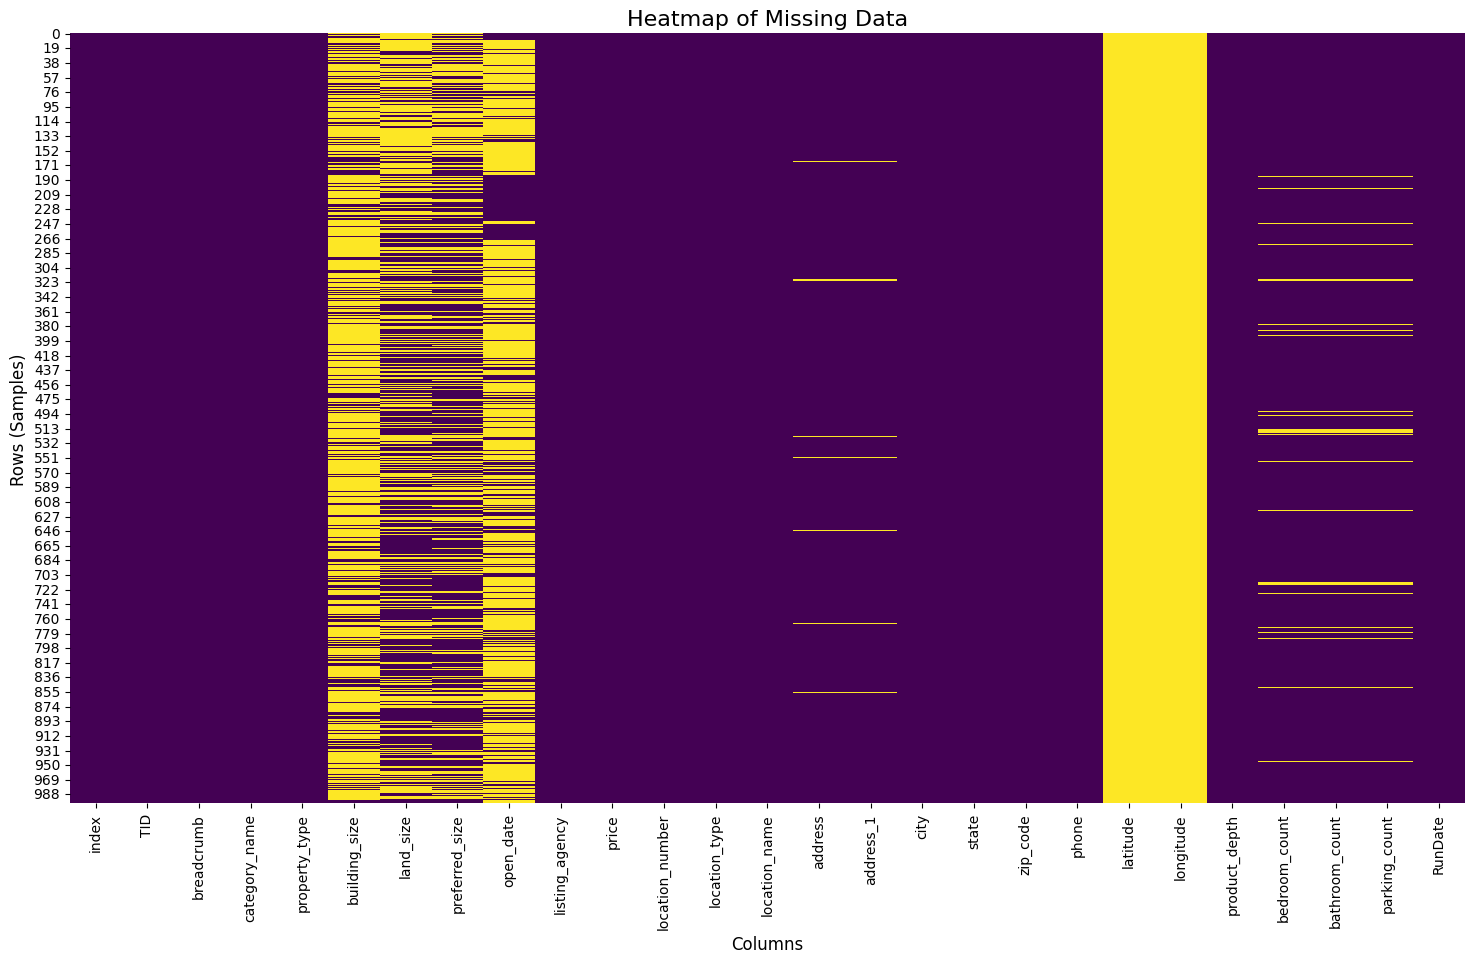

In [ ]:
# Create a heatmap to visualize the location of missing values
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add a title
plt.title('Heatmap of Missing Data', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows (Samples)', fontsize=12)

# Display the plot
plt.show()

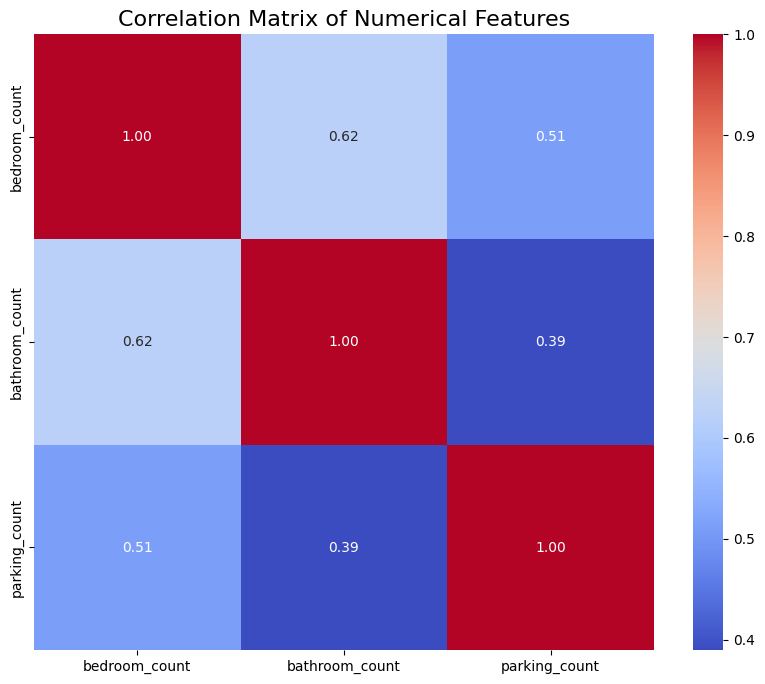

In [ ]:
# Select only the numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Drop columns that are just identifiers or flags, not features
# 'TID' and 'index' were already dropped in the previous plan, but it's good practice to ensure.
# We also drop 'is_house' since that's our target, not a predictor.
# And 'latitude'/'longitude' are all nulls.
numerical_features = numerical_df.drop(columns=['TID', 'index', 'is_house', 'latitude', 'longitude', 'zip_code', 'location_number'], errors='ignore')


# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Display the plot
plt.show()

In [ ]:
# Select the same features for prediction
cat_features = ['city', 'state', 'product_depth', 'building_size', 'land_size']
num_features = ['bedroom_count', 'bathroom_count', 'parking_count']
features = cat_features + num_features

# Use the original 'property_type' as our multi-class target
target = 'property_type'

# Create a new DataFrame without missing values in the target column
# This is important to ensure we can train the model properly
df_multi = df[features + [target]].dropna(subset=[target]).copy()

# Define our features (X) and target (y) from this cleaned dataframe
X = df_multi[features]
y = df_multi[target]

# Display the class distribution in our target variable
print("Class distribution in the target variable 'property_type':")
print(y.value_counts())

Class distribution in the target variable 'property_type':
property_type
House                   441
Unit                    230
Apartment               212
Townhouse                38
Residential Land         33
Duplex/Semi-detached     19
Acreage                   9
Block Of Units            6
Other                     4
Villa                     4
Studio                    2
Warehouse                 1
Lifestyle                 1
Name: count, dtype: int64


In [ ]:
#Grouping infrequent classes to one singe class
# Calculate the frequency of each class in the target variable
value_counts = y.value_counts()

# Identify the classes to be replaced (those with counts less than 6)
to_replace = value_counts[value_counts < 6].index

# Replace these infrequent classes with 'Other'
# .loc is used to modify the series 'y' in place
y.loc[y.isin(to_replace)] = 'Other'

# Display the new class distribution to confirm the change
print("\nClass distribution AFTER grouping:")
print(y.value_counts())


Class distribution AFTER grouping:
property_type
House                   441
Unit                    230
Apartment               212
Townhouse                38
Residential Land         33
Duplex/Semi-detached     19
Other                    12
Acreage                   9
Block Of Units            6
Name: count, dtype: int64


/tmp/ipython-input-726362339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y.isin(to_replace)] = 'Other'


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the new dataframes to confirm the split
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 8)
Shape of X_test: (200, 8)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [ ]:
#Creating preprocessing pipelines

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# FIX: Add sparse_output=False to the OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


--- Training SVM ---


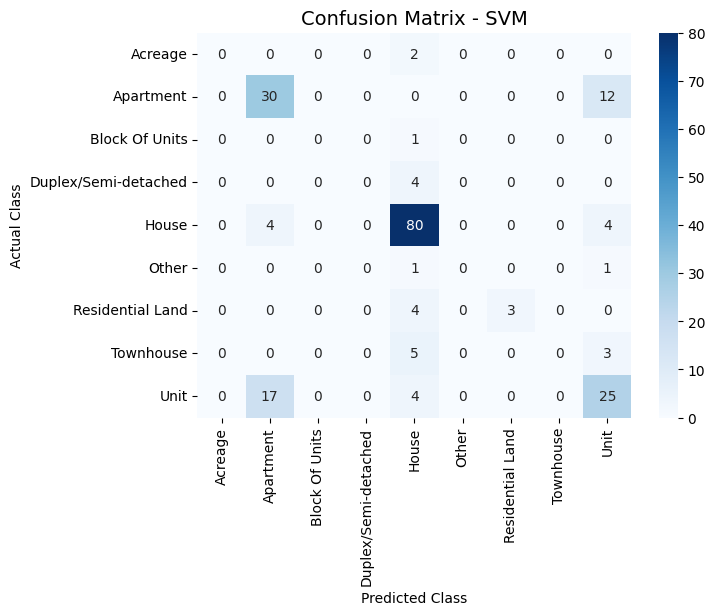

--- Training Decision Tree ---


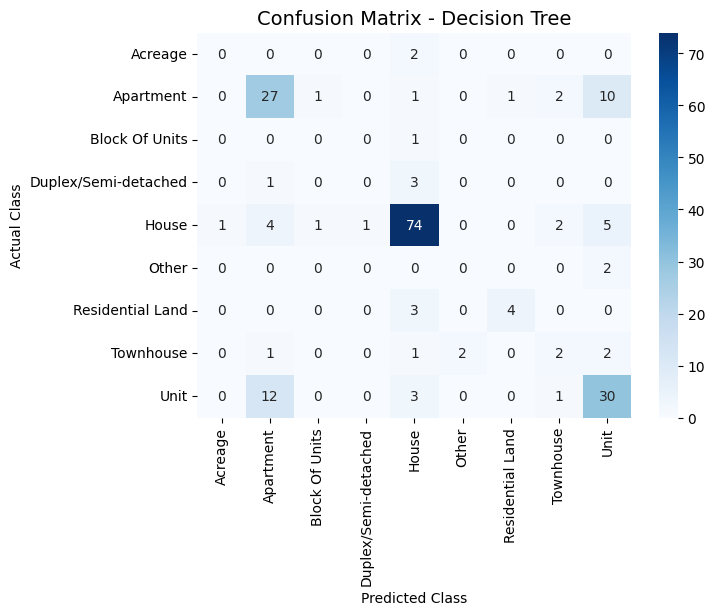

--- Training Naïve Bayes ---


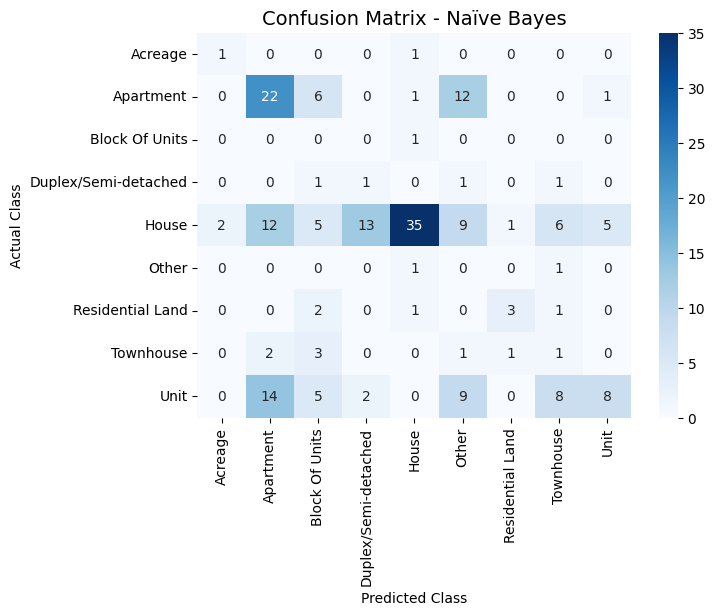

--- Training k-NN ---


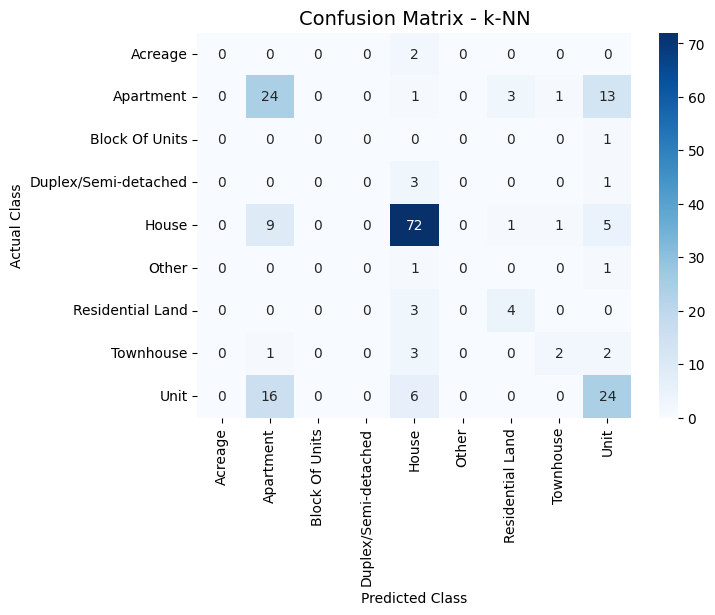

--- Training Random Forest ---


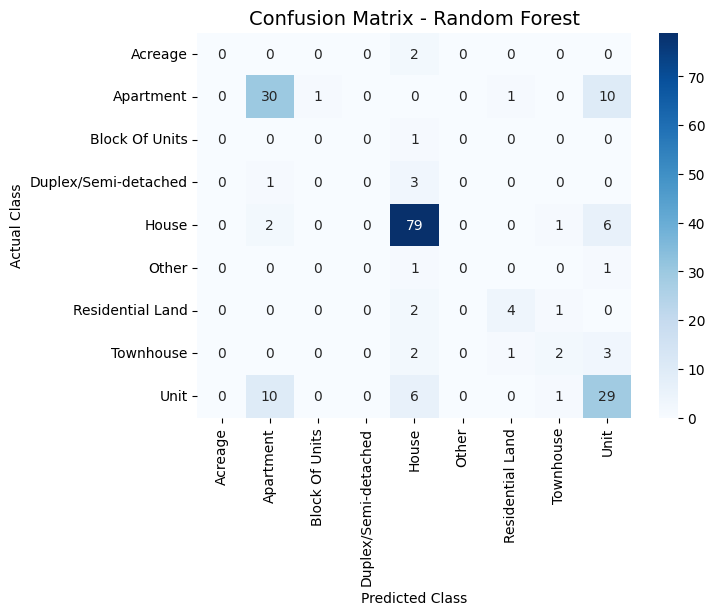


--- Model training and evaluation complete! ---


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the models we want to train
models = {
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to store the performance metrics of each model
performance_metrics = {}

# Get the class labels for the confusion matrix plot
class_labels = sorted(y_test.unique())

# Loop through each model
for name, model in models.items():
    # Create the full pipeline by combining the preprocessor and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Train the model
    print(f"--- Training {name} ---")
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store the metrics
    performance_metrics[name] = [accuracy, precision, recall, f1]

    # --- Generate and display the Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    plt.figure(figsize=(7, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {name}', fontsize=14)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

print("\n--- Model training and evaluation complete! ---")

In [ ]:
#Final performance comparison
# Convert the performance metrics dictionary to a pandas DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index',
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Sort the DataFrame by F1-Score in descending order
performance_df.sort_values(by='F1-Score', ascending=False, inplace=True)

print("--- Model Performance Summary ---")
performance_df

--- Model Performance Summary ---


,Accuracy,Precision,Recall,F1-Score
Random Forest,0.720,0.684051,0.720,0.700329
Decision Tree,0.685,0.676245,0.685,0.679608
SVM,0.690,0.634822,0.690,0.655344
k-NN,0.630,0.603879,0.630,0.614241
Naïve Bayes,0.355,0.636634,0.355,0.428970


**Conclusion and interpretation:**

Here we can clearly see that Random forest has out performed all the other four classifiers. and also that decision tree has performed better than the other three below it.
1. Essentially because trees/tree models are exceptionally good at handling tabular data with a mix of numerical and categorical features.
2. They can capture complex, non-linear relationships without requiring extensive feature scaling, which makes them a strong choice for datasets like this one.
3. When it comes to random forest alone:  
being an "ensemble" of many decision trees, is often more robust and less prone to overfitting than a single Decision Tree, which is why it frequently comes out on top.

  
Now when is comes to the under performer classifier Naive baise:  
It's performance is often hampered by its core assumption that all features are independent of one another. In a real-world dataset like this, features are rarely truly independent (e.g., the number of bedrooms is related to the building size). This is likely why it couldn't compete with the other models.

Now we do some advanced interpretation using ROC curve

--- Skipping ROC for SVM (does not support probability estimates) ---
--- Generating ROC Curve for Decision Tree ---


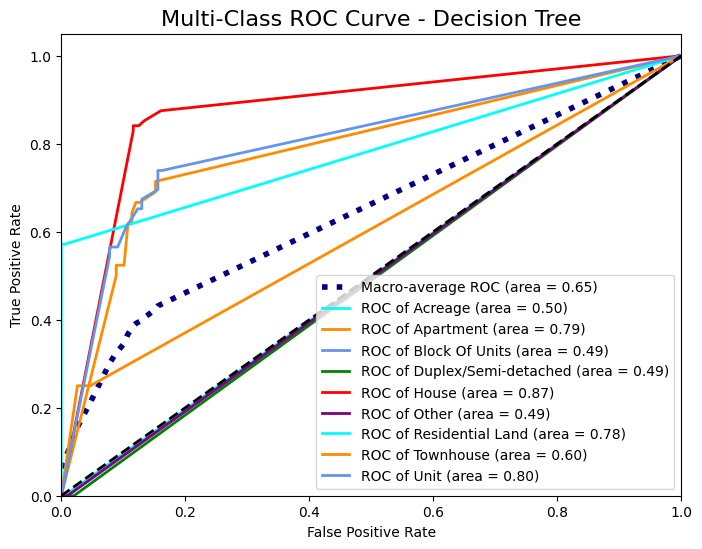

--- Generating ROC Curve for Naïve Bayes ---


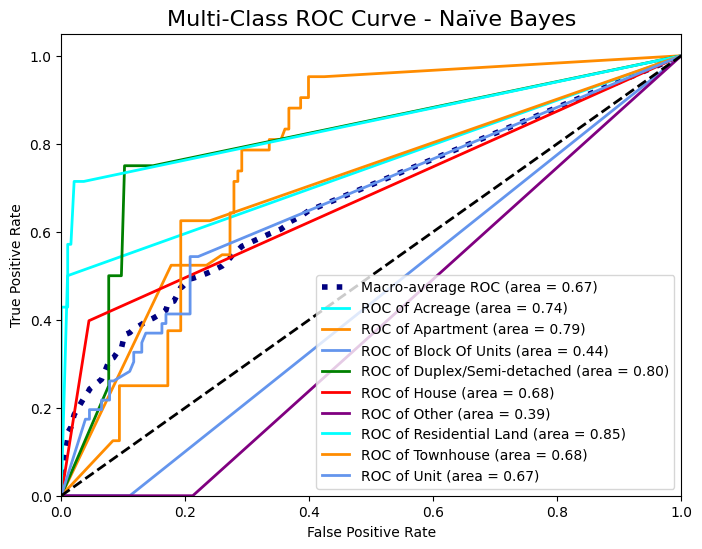

--- Generating ROC Curve for k-NN ---


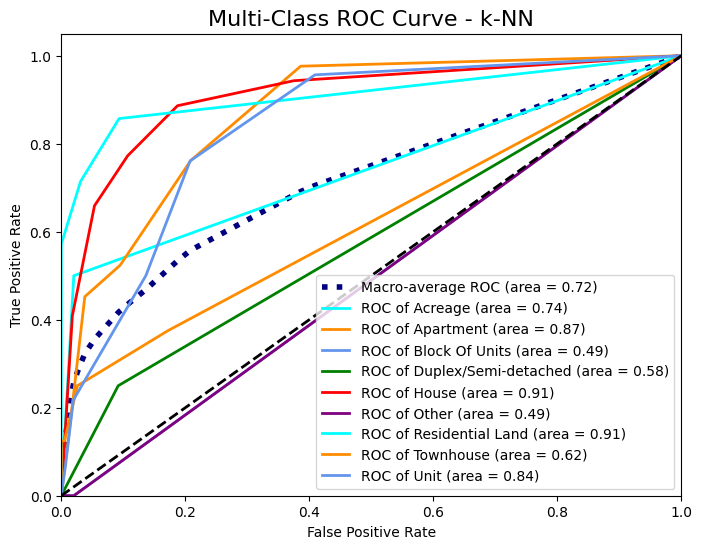

--- Generating ROC Curve for Random Forest ---


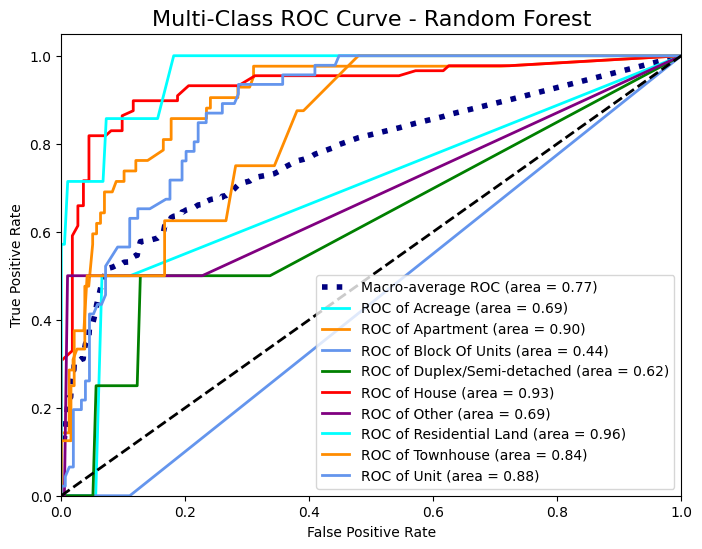

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for OvR(One vs rest) ROC curve calculation
# This creates a column for each class (e.g., House, Unit, etc.)
y_bin = label_binarize(y, classes=class_labels)
y_test_bin = label_binarize(y_test, classes=class_labels)
n_classes = y_bin.shape[1]

# Loop through each model to generate and plot its ROC curves
for name, model in models.items():
    # We need a classifier that can predict probabilities for this
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # We can only plot ROC curves for models that can provide probability scores
    if not hasattr(pipeline, "predict_proba"):
        print(f"--- Skipping ROC for {name} (does not support probability estimates) ---")
        continue

    print(f"--- Generating ROC Curve for {name} ---")

    # Get the probability scores for each class on the test set
    y_score = pipeline.predict_proba(X_test)

    # --- Plotting Setup ---
    plt.figure(figsize=(8, 6))

    # Dictionaries to store the False Positive Rate, True Positive Rate, and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate the ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculate the macro-average ROC curve and AUC
    # This gives us a single measure of overall performance
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # --- Plot all ROC curves on one graph ---
    # Plot the macro-average curve
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    # Plot the curve for each individual class
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC of {class_labels[i]} (area = {roc_auc[i]:.2f})')

    # Plot the line for a random classifier (no skill)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Formatting
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-Class ROC Curve - {name}', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()